In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error
import math

In [3]:
df_clean=pd.read_csv('/Users/jessie/Desktop/preprocessed.csv', index_col=0)
df_clean

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,date,DOW
206668,Air_India,Delhi,Evening,one,Night,Mumbai,Business,24.75,1,42220,2022-02-11,4
206669,Air_India,Delhi,Night,one,Night,Mumbai,Business,26.50,1,44450,2022-02-11,4
206670,Air_India,Delhi,Evening,one,Night,Mumbai,Business,6.67,1,46690,2022-02-11,4
206671,Vistara,Delhi,Evening,zero,Night,Mumbai,Business,2.17,1,50264,2022-02-11,4
206672,Air_India,Delhi,Night,one,Afternoon,Mumbai,Business,17.75,1,50669,2022-02-11,4
...,...,...,...,...,...,...,...,...,...,...,...,...
206661,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,Economy,13.83,49,7697,2022-03-31,3
206662,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,Economy,13.83,49,7709,2022-03-31,3
206663,Vistara,Chennai,Afternoon,one,Morning,Hyderabad,Economy,20.58,49,8640,2022-03-31,3
206664,Vistara,Chennai,Morning,one,Morning,Hyderabad,Economy,23.33,49,8640,2022-03-31,3


In [4]:
# OHE
df_clean = pd.get_dummies(data=df_clean, columns=['airline','source_city','departure_time','stops','arrival_time','destination_city','class','DOW'])

In [5]:
# train test split
X=df_clean.drop(['price','date'], axis=1)
y=df_clean.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [8]:
def get_prediction(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_train)
    maep_tr = mean_absolute_percentage_error(y_train,y_pred)
    rmse_tr = math.sqrt(mean_squared_error(y_train, y_pred))
    r2_tr  = r2_score(y_train,y_pred)
    y_pred_test = model.predict(X_test)
    maep_te = mean_absolute_percentage_error(y_test,y_pred_test)
    rmse_te = math.sqrt(mean_squared_error(y_test, y_pred_test))
    r2_te  = r2_score(y_test,y_pred_test)
    
    scores = cross_val_score(model, X_train, y_train, cv=10)
    mean_scores=np.mean(scores)
    return print(f"""At Training: \nMAPE: {maep_tr}\nRMSE: {rmse_tr}\nR2_Score: {r2_tr}
    \nAt Testing: \nMAPE: {maep_te}\nRMSE: {rmse_te}\nR2_Score: {r2_te}
    \nCross Validation: \nR2_Score: {mean_scores}""")

In [9]:
LR=LinearRegression()
get_prediction(LR)
#coefficients = LR.coef_
#intercept = LR.intercept_

At Training: 
MAPE: 0.3304178797279264
RMSE: 5173.138008668676
R2_Score: 0.9469149783308191
    
At Testing: 
MAPE: 0.328553753792247
RMSE: 5194.894873557007
R2_Score: 0.9467722736405935
    
Cross Validation: 
R2_Score: 0.946894572590787


In [6]:
## LR with summary table
import statsmodels.formula.api as smf
train_data=pd.concat([X_train, y_train], axis=1)
LR1 = smf.ols(formula = 
        'price ~ duration+days_left+airline_Air_India+airline_Other+airline_Vistara+source_city_Bangalore+\
        source_city_Chennai+source_city_Delhi+source_city_Hyderabad+source_city_Kolkata+source_city_Mumbai+\
        departure_time_Afternoon+departure_time_Early_Morning+departure_time_Evening+departure_time_Late_Night+\
        departure_time_Morning+departure_time_Night+stops_one+stops_two_or_more+stops_zero+arrival_time_Afternoon+\
        arrival_time_Early_Morning+arrival_time_Evening+arrival_time_Late_Night+arrival_time_Morning+arrival_time_Night+\
        destination_city_Bangalore+destination_city_Chennai+destination_city_Delhi+destination_city_Hyderabad+\
        destination_city_Kolkata+destination_city_Mumbai+class_Business+class_Economy+DOW_0+DOW_1+DOW_2+DOW_3+DOW_4+DOW_5+\
        DOW_6', data = train_data) 
lm1 = LR1.fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                 1.170e+05
Date:                Tue, 07 Mar 2023   Prob (F-statistic):               0.00
Time:                        11:00:31   Log-Likelihood:            -2.1586e+06
No. Observations:              216507   AIC:                         4.317e+06
Df Residuals:                  216473   BIC:                         4.318e+06
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                     1.002e+04     16.635    602.363      0.000    9987.422    1.01e+04
duration                         4.2443      2.112      2.010      0.044       0.106       8.383
days_left                      -73.4732      0.862    -85.226      0.000     -75.163     -71.784
airline_Air_India             2056.3402     20.297    101.313      0.000    2016.559    2096.122
airline_Other                 2880.7210     19.906    144.720      0.000    2841.707    2919.735
airline_Vistara               5082.9639     17.385    292.376      0.000    5048.890    5117.038
source_city_Bangalore         1975.6455     25.319     78.029      0.000    1926.020    2025.271
source_city_Chennai           1854.5765     28.683     64.658      0.000    1798.359    1910.794
source_city_Delhi              427.2116     23.992     17.806      0.000     380.188     474.236
source_city_Hyderabad          654.0488     27.671     23.636      0.000     599.814     708.284
source_city_Kolkata           3078.8654     26.960    114.200      0.000    3026.024    3131.707
source_city_Mumbai            2029.6773     24.081     84.285      0.000    1982.479    2076.875
departure_time_Afternoon       976.7902     36.541     26.731      0.000     905.170    1048.410
departure_time_Early_Morning  1777.4505     34.071     52.168      0.000    1710.671    1844.230
departure_time_Evening        1610.8112     34.368     46.869      0.000    1543.450    1678.172
departure_time_Late_Night     2422.8353    140.161     17.286      0.000    2148.124    2697.547
departure_time_Morning        1652.6443     34.206     48.314      0.000    1585.601    1719.688
departure_time_Night          1579.4937     36.537     43.230      0.000    1507.882    1651.106
stops_one                     4499.2826     23.873    188.465      0.000    4452.492    4546.074
stops_two_or_more             5271.1855     45.314    116.325      0.000    5182.370    5360.001
stops_zero                     249.5570     32.499      7.679      0.000     185.859     313.254
arrival_time_Afternoon        1248.9505     29.712     42.035      0.000    1190.716    1307.185
arrival_time_Early_Morning     664.9370     42.884     15.505      0.000     580.885     748.988
arrival_time_Evening          2100.9123     23.667     88.768      0.000    2054.525    2147.300
arrival_time_Late_Night       2001.9230     45.521     43.978      0.000    1912.703    2091.143
arrival_time_Morning          1828.1497     25.176     72.613      0.000    1778.804    1877.495
arrival_time_Night            2175.1527     22.213     97.924      0.000    2131.617    2218.689
destination_city_Bangalore    2022.7739     25.384     79.687      0.000    1973.022    2072.526
destination_city_Chennai      1793.6618     28.048     63.950      0.000    

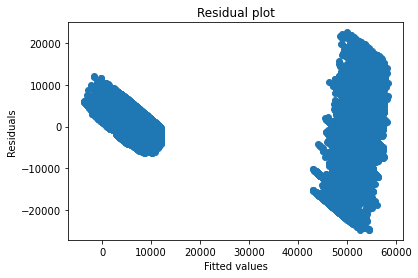

In [10]:
# residual plots
resid = lm1.resid
fig, ax = plt.subplots()
ax.scatter(lm1.fittedvalues, resid)
ax.set_xlabel("Fitted values")
ax.set_ylabel("Residuals")
ax.set_title("Residual plot")
plt.show()